# **MLflow: An Overview**

**MLflow** is an open-source platform designed to manage the entire machine learning lifecycle. It simplifies tracking experiments, packaging code into reproducible formats, and deploying machine learning models.

---

## **Key Features of MLflow**

### **1. Experiment Tracking**
- Tracks parameters, metrics, and artifacts (e.g., models, datasets, visualizations) during training.
- Provides a dashboard (MLflow UI) for visualizing and comparing results across multiple experiments.

### **2. Model Registry**
- A centralized repository to store and manage machine learning models.
- Supports versioning, stage transitions (e.g., staging to production), and metadata tracking for each model.

### **3. Model Packaging**
- Packages models in a standard format (`MLmodel`) that is compatible with multiple tools.
- Supports saving models in frameworks like TensorFlow, PyTorch, Scikit-learn, and XGBoost.

### **4. Deployment**
- Deploys models to various serving platforms, including REST APIs, cloud services, and edge devices.
- Supports built-in deployment to tools like Azure ML, AWS SageMaker, and Kubernetes.

### **5. Integration with Popular ML Libraries**
- Compatible with libraries like Scikit-learn, TensorFlow, PyTorch, Keras, XGBoost, and SparkML.
- Provides APIs for Python, R, Java, and REST.

---

## **MLflow Components**

MLflow consists of four primary components:

### **1. MLflow Tracking**
- Records and queries experiments via a logging API or a user interface.
- Stores parameters, metrics, and outputs in a backend (local file system, database, or remote server).

### **2. MLflow Projects**
- Standardizes packaging ML code into a reusable format using a `conda.yaml` or `Docker` file.
- Facilitates sharing and collaboration across teams.

### **3. MLflow Models**
- Enables saving and ser


# **1. Experiments in MLflow**

An **experiment** in MLflow refers to a logical grouping of related runs. It helps organize and track multiple iterations of a machine learning project, allowing data scientists to compare results systematically.

---

## **What is an Experiment?**
- **Definition:** An experiment is a container for multiple runs. Each run represents a single execution of a training script or model.
- **Purpose:** It allows tracking of parameters, metrics, artifacts, and metadata across different runs to identify the best-performing model.

---

## **Key Components of an Experiment**
### 1. **Runs**
   - Each run is a single execution of the training process.
   - It captures:
     - **Parameters:** Hyperparameters like learning rate, batch size, etc.
     - **Metrics:** Performance metrics like accuracy, loss, precision, etc.
     - **Artifacts:** Files like model binaries, plots, or datasets.
     - **Source Code:** Versioned code used in the run.

### 2. **Experiment ID**
   - A unique identifier assigned to each experiment.
   - Used to reference the experiment programmatically.

### 3. **Experiment Name**
   - A human-readable name for the experiment to make it easier to identify.

---

## **Creating and Using Experiments**
- **Default Experiment:** MLflow provides a default experiment if no custom experiment is created.
- **Custom Experiment:** You can create and manage experiments manually using the MLflow API or CLI.



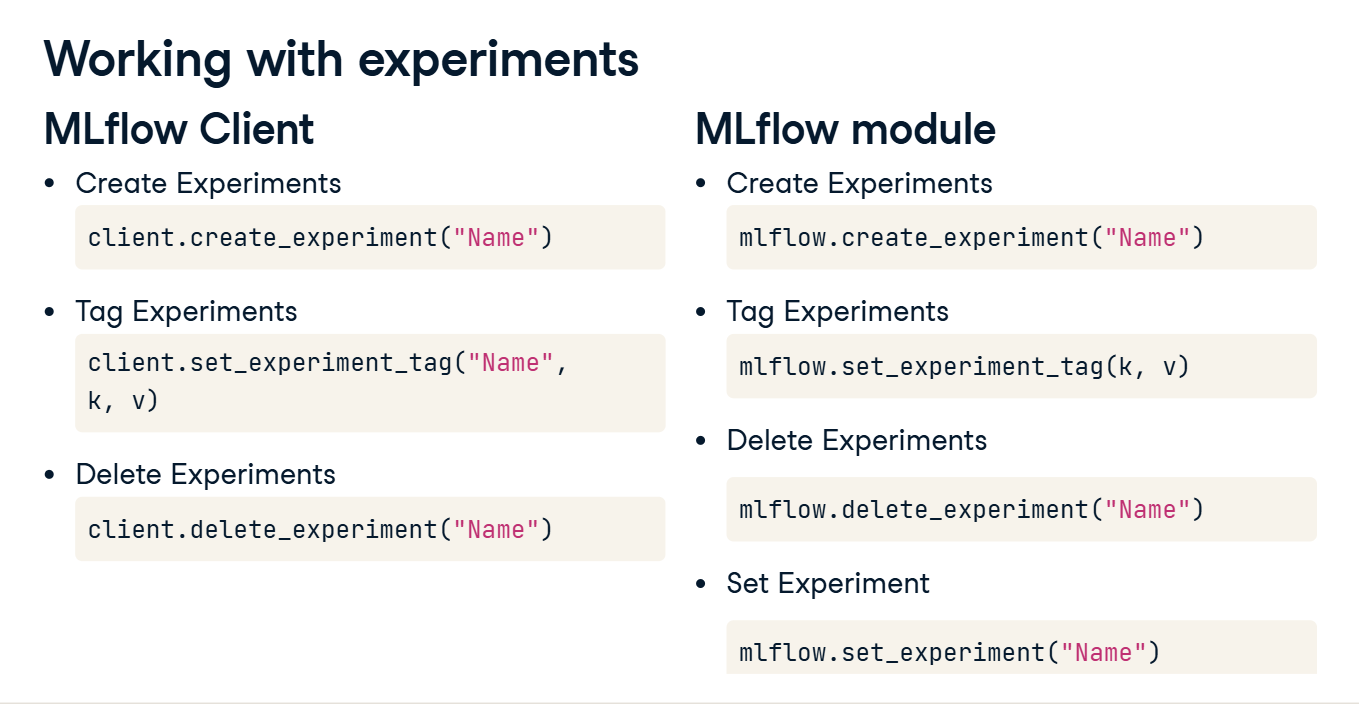

In [1]:
# !pip install mlflow -q

In [1]:
import mlflow

mlflow.create_experiment("My Experiment 1")

mlflow.set_experiment_tag("SKLearn", "lr") 

mlflow.set_experiment("My Experiment 1") # set_experiment is to use / to work on this one experiment 

<Experiment: artifact_location='file:///D:/jupyter%20notebook/Learn%20New/mlflow/mlruns/614741192048536315', creation_time=1734595920087, experiment_id='614741192048536315', last_update_time=1734595920087, lifecycle_stage='active', name='My Experiment 1', tags={}>

In [14]:
mlflow.end_run()

In [91]:
experiment_name = 'testing-mlflow-1'

experiment_id = mlflow.create_experiment(
    name=experiment_name,
    artifact_location='testing-mlflow-1-artifact',
    tags={'env':'dev', 'version':'1.0.0'}
)

print(f"Experiment name: {experiment_name}, experiment_id: {experiment_id}")

Experiment name: testing-mlflow-1, experiment_id: 482835921199255659


### Deleting Experiments

In [88]:
import shutil, os

# Get the experiment ID (replace "experiment_name" with the actual name)
experiment = mlflow.get_experiment_by_name("testing-mlflow-1")

if experiment:
    # Delete the experiment using its ID
    mlflow.delete_experiment(experiment.experiment_id)
    print(f"Experiment '{experiment_id.name}' deleted.")
else:
    print("Experiment not found.")
    
shutil.rmtree(os.path.join(os.getcwd(), 'mlruns', ".trash", experiment.experiment_id))

In [97]:
experiment = mlflow.get_experiment_by_name("testing-mlflow-1")
# experiment = mlflow.get_experiment(experiment_id=<experiment_id>)

print(f"Artifact_location: {experiment.artifact_location}")
print(f"experiment_id: {experiment.experiment_id}")
print(f"name: {experiment.name}")
print(f"tags: {experiment.tags}")

Artifact_location: file:///D:/jupyter notebook/Learn New/mlflow/testing-mlflow-1-artifact
experiment_id: 482835921199255659
name: testing-mlflow-1
tags: {'env': 'dev', 'version': '1.0.0'}


In [90]:
os.getcwd()

'D:\\jupyter notebook\\Learn New\\mlflow'

# 2. MLFlow Tracking

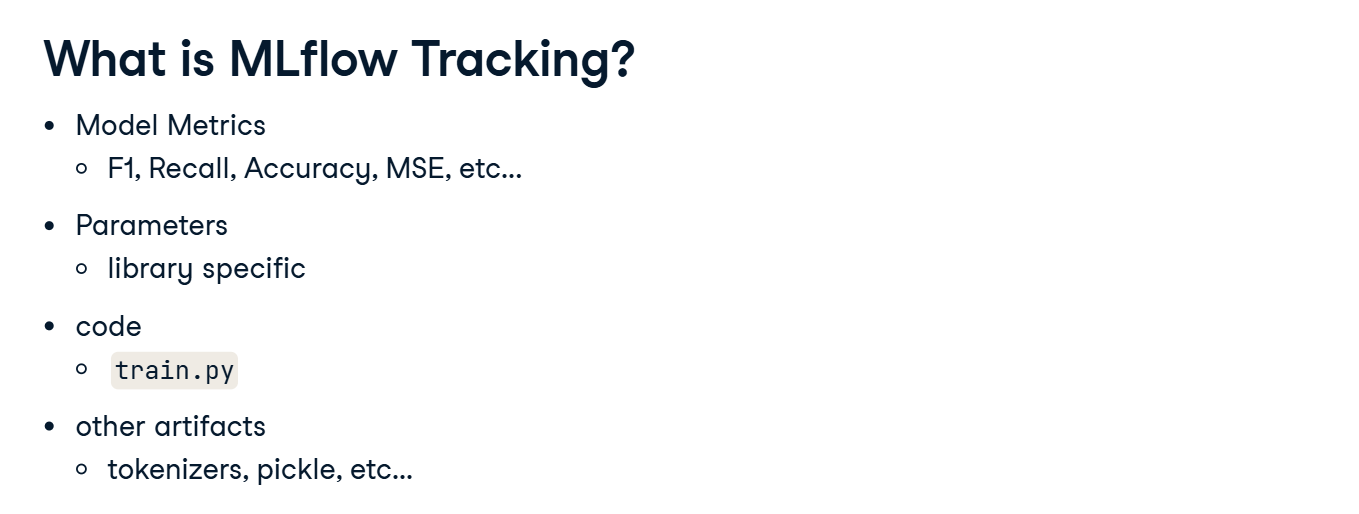

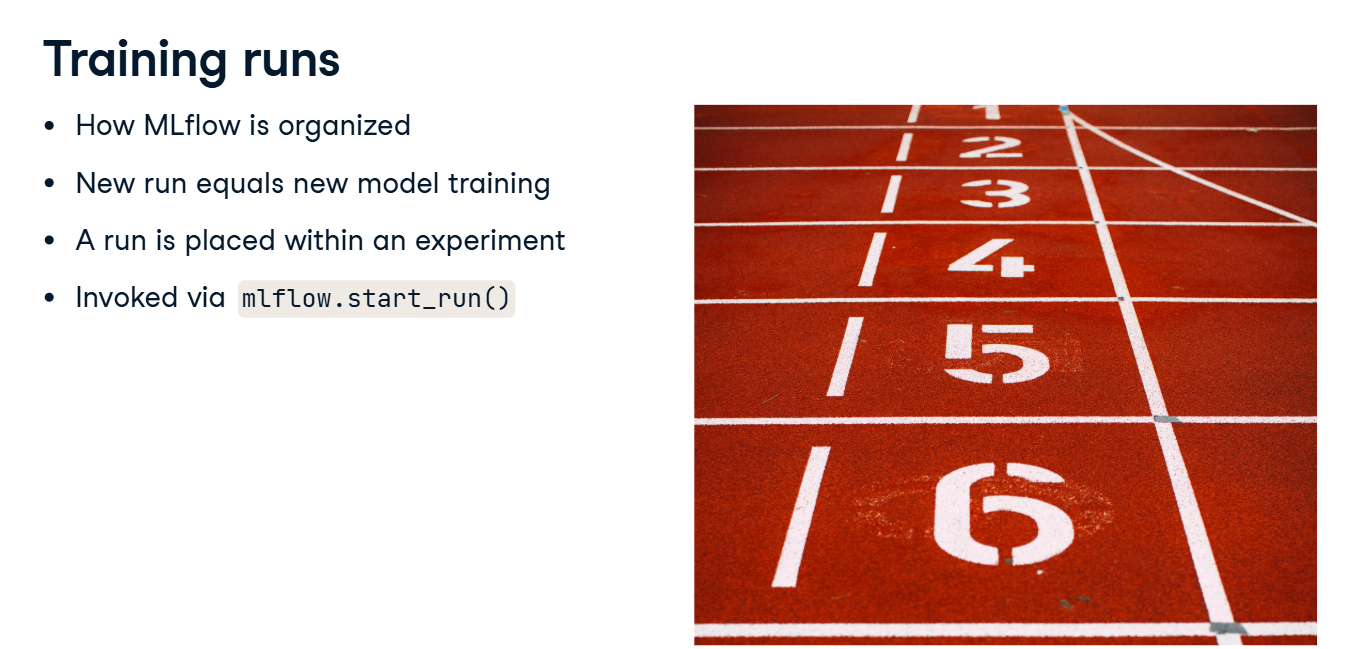

# **Experiments vs. Runs in MLflow**

## **1. Experiment**
- **Definition**: 
  An **experiment** is a container or grouping for multiple **runs**. It is used to organize and track related model training sessions or workflows. For example, you might create an experiment to explore different hyperparameters for a specific algorithm or test various models on the same dataset.

- **Key Features**:
  - Experiments group related runs under a common name.
  - Each experiment is identified by a unique **Experiment ID**.
  - Experiments can be categorized and filtered in the MLflow UI.

- **Usage Example**:
  - Experiment: *"Hyperparameter Tuning for Logistic Regression"*
  - Contains multiple runs, each corresponding to a different set of hyperparameters.

---

## **2. Run**
- **Definition**:
  A **run** represents a single execution of your code. It logs specific metadata, parameters, metrics, artifacts, and tags for that particular execution. A run is always associated with one experiment.

- **Key Features**:
  - Runs capture the output of a single experiment iteration.
  - Each run has a unique **Run ID**.
  - Logs include:
    - **Parameters**: Input values like learning rate, number of layers, etc.
    - **Metrics**: Outputs like accuracy, loss, etc.
    - **Artifacts**: Files generated during the run (e.g., models, plots).
    - **Source Information**: Script name, version, and environment details.

- **Usage Example**:
  - Run 1: Logistic regression with `learning_rate=0.01`, accuracy=`92%`.
  - Run 2: Logistic regression with `learning_rate=0.1`, accuracy=`90%`.

---

## **Comparison Table**

| **Aspect**         | **Experiment**                                      | **Run**                                              |
|---------------------|----------------------------------------------------|-----------------------------------------------------|
| **Definition**      | A container for multiple runs.                     | A single execution or iteration within an experiment. |
| **Scope**           | Tracks multiple related runs.                      | Tracks specific metadata, parameters, and results of one iteration. |
| **Identifier**      | Experiment ID and Name.                            | Run ID (unique for each execution).                |
| **Granularity**     | Coarse-grained grouping of related workflows.       | Fine-grained tracking of a specific workflow instance. |
| **Examples**        | Hyperparameter tuning experiment.                  | Single model training with a specific hyperparameter set. |

---




In [98]:
mlflow.set_experiment("testing-mlflow-1") 
# alternative of set_experiment is mlflow.start_run(<run_name>, experiment_id=<experiment_id>)

with mlflow.start_run(run_name="mlflow_run1") as run:
    
    mlflow.log_param("learning_rate", 0.01)
    print(f"run id: {run.info.run_id}")
    


<Experiment: artifact_location='file:///D:/jupyter notebook/Learn New/mlflow/testing-mlflow-1-artifact', creation_time=1734728087794, experiment_id='482835921199255659', last_update_time=1734728087794, lifecycle_stage='active', name='testing-mlflow-1', tags={'env': 'dev', 'version': '1.0.0'}>

In [15]:
mlflow.set_experiment("LR Experiment")

mlflow.start_run()

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=200)  # Increased max_iter for convergence
logistic_model.fit(X, y)

# Make predictions
y_pred = logistic_model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

mlflow.log_metric("accuracy", accuracy)
mlflow.log_param("max_iter", 200)
# mlflow.log_artifact("train_code.py")

with open("artifact_testing.txt") as f:
    f.write("Hello World!\nThis is Artifact logging testing.")

mlflow.log_artifact(local_path = "artifact_testing.txt", artifact_path = "artifact_files")
mlflow.log_artifacts(local_dir = "artifact_dir", artifact_path = "artifact_dir")


mlflow.end_run()

Accuracy: 97.33%


200

In [3]:
mlflow.set_experiment("My Experiment 1")

run = mlflow.start_run()

run.info

<RunInfo: artifact_uri='file:///D:/jupyter%20notebook/Learn%20New/mlflow/mlruns/614741192048536315/d1fdf6b266da453fbc8c2268c1a493bc/artifacts', end_time=None, experiment_id='614741192048536315', lifecycle_stage='active', run_id='d1fdf6b266da453fbc8c2268c1a493bc', run_name='abrasive-ray-565', run_uuid='d1fdf6b266da453fbc8c2268c1a493bc', start_time=1734595933368, status='RUNNING', user_id='Yatrik'>

### Run mlflow UI

In [3]:
import subprocess

def start_mlflow_ui(port=5000):
    try:
        # Launch MLflow UI
        subprocess.Popen(["mlflow", "ui", "--port", str(port)])
        print(f"MLflow UI is running at http://localhost:{port}")
    except Exception as e:
        print("Error starting MLflow UI:", e)

# Call the function to start the UI
start_mlflow_ui()


MLflow UI is running at http://localhost:5000


In [14]:
import mlflow

# mlflow.create_experiment("Test exp")

mlflow.set_experiment("Test exp")

run = mlflow.start_run(run_name="my run 2")

mlflow.log_metric('accuracy', 0.85)
mlflow.log_metrics({'f1': 0.7, 'precision': .65})

mlflow.log_param('parameter1', 'value1')
mlflow.log_params({'n_estimators': 100, 'method': 'gini'})

mlflow.end_run()

### Remainnig MLFlow Quqries

## MLFlow Models

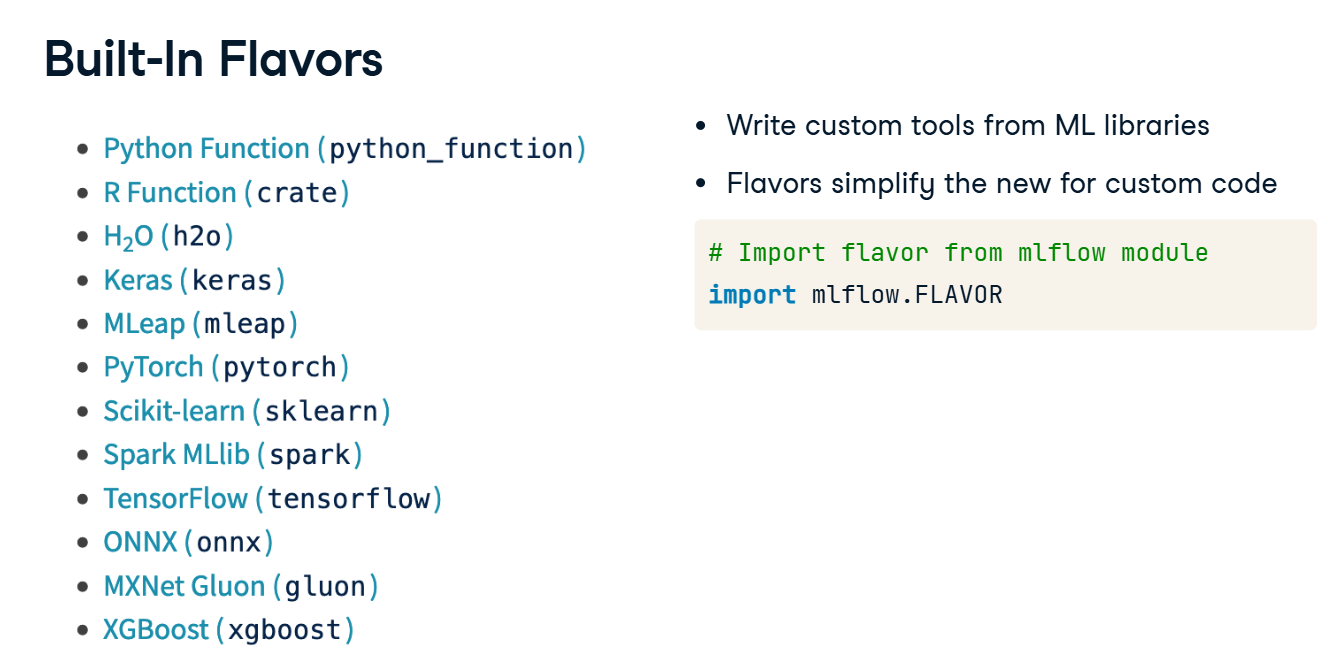

In [20]:
import mlflow.sklearn

In [26]:
run = mlflow.start_run(run_name="lr on diabetes data")

mlflow.sklearn.autolog()

In [27]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset (predefined regression dataset)
data = load_diabetes()

# Convert it to a Pandas DataFrame for better understanding
X = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target (dependent variable) to the DataFrame
y = data.target

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [29]:
mlflow.end_run()

In [30]:
mlflow.start_run(run_name = "Decision Tree on diabetes data")

<ActiveRun: >

In [32]:
mlflow.sklearn.autolog()

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X, y)

DecisionTreeRegressor()

In [33]:
mlflow.end_run()

## MLFLow API

In [36]:
mlflow.sklearn.save_model(tree, "./dt")

In [41]:
loaded = mlflow.sklearn.load_model("./dt")
loaded

DecisionTreeRegressor()

In [43]:
mlflow.sklearn.log_model(loaded, "tracking_path")

2024/12/19 15:31:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [45]:
mlflow.end_run()

In [46]:
last_run = mlflow.last_active_run()
last_run

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.log-model.history': '[{"run_id": "42d191f4545f4a9ca241bf9519b30d55", '
                             '"artifact_path": "tracking_path", '
                             '"utc_time_created": "2024-12-19 '
                             '21:31:18.799889", "model_uuid": '
                             '"f07c3a3c0bfb4b0683121033e45ad4df", "flavors": '
                             '{"python_function": {"model_path": "model.pkl", '
                             '"predict_fn": "predict", "loader_module": '
                             '"mlflow.sklearn", "python_version": "3.8.20", '
                             '"env": {"conda": "conda.yaml", "virtualenv": '
                             '"python_env.yaml"}}, "sklearn": '
                             '{"pickled_model": "model.pkl", '
                             '"sklearn_version": "1.3.2", '
                             '"serialization_format": "cloudpickle", "code": '
                       

In [47]:
run_id = last_run.info.run_id
run_id

'42d191f4545f4a9ca241bf9519b30d55'

In [48]:
loaded_model = mlflow.sklearn.load_model(f"runs:/{run_id}/tracking_path")
loaded_model

DecisionTreeRegressor()

## Custom Models

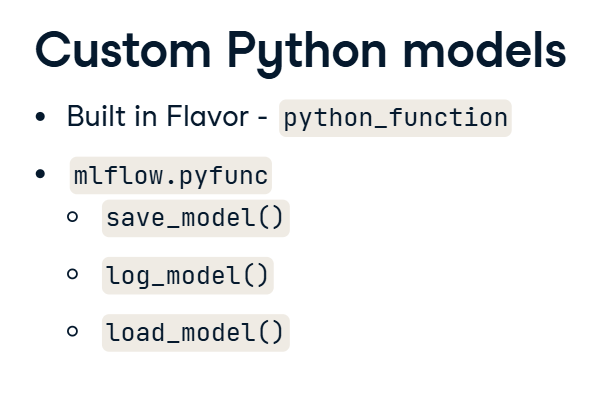

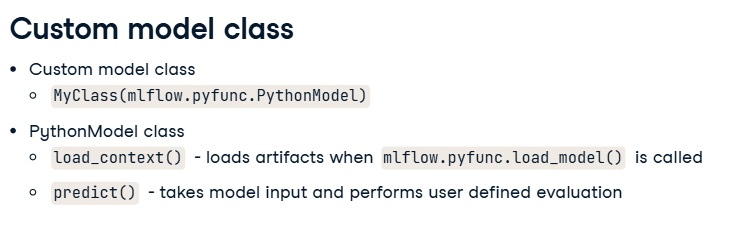

In [50]:
# custom class example

class CustomPredict(mlflow.pyfunc.PythonModel):
    
    #load artifacts
    def load_context(self, context):
        self.model = mlflow.sklearn.load_model(context.artifacts['custom_model'])
        
    #prediction
    def predict(self, copntext, model_input):
        prediction = self.model.predict(model_input)
        return custom_function(prediction)

In [51]:
mlflow.pyfunc.save_model(path='custom_model', python_model=CustomPredict())

2024/12/19 16:00:56 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: custom_model, flavor: python_function). Fall back to return ['cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 


In [52]:
mlflow.pyfunc.log_model(artifact_path="custom_model", python_model = CustomPredict())

2024/12/19 16:02:28 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\Yatrik\AppData\Local\Temp\tmptfo4s_bi\model, flavor: python_function). Fall back to return ['cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 
2024/12/19 16:02:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [57]:
mlflow.pyfunc.load_model("dt")

mlflow.pyfunc.loaded_model:
  flavor: mlflow.sklearn

In [69]:
y = pd.Series(y)
y.name='label'

mlflow.end_run()
mlflow.start_run(run_name="model_eval")
mlflow.evaluate(
    f"runs:/84bfc383d75140fe8015f01cdb086177/model",
    pd.concat([X, y], axis=1),
    targets=  'label',
    model_type = 'regressor'
)

2024/12/19 16:14:47 INFO mlflow.models.evaluation.default_evaluator: Computing model predictions.
2024/12/19 16:14:47 INFO mlflow.models.evaluation.default_evaluator: Testing metrics on first row...
2024/12/19 16:14:47 WARNING mlflow.models.evaluation.default_evaluator: SHAP or matplotlib package is not installed, so model explainability insights will not be logged.


In [70]:
mlflow.end_run()

## Model Registration

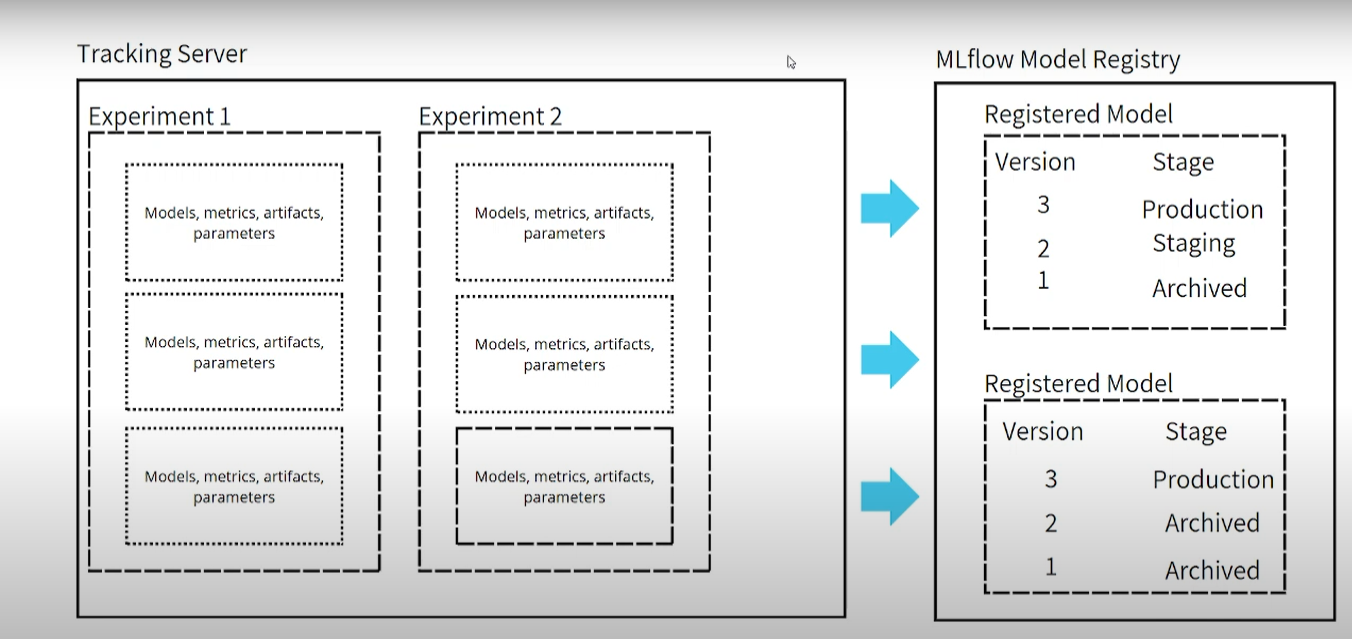

#### After these all experiments and runs, whichever model with whatever parameters seems best we can move that model to model registery

In [74]:
run_id = "ff2cd15e0b3b4b5fafe04392587990bd"
result = mlflow.register_model(f"runs:/{run_id}/model", "Logistic-Regression-Model")

#alternative
# mlflow.sklearn.log_model(name, artifact_uri, registered_model_name = "<MODEL_NAME>")

Registered model 'Logistic-Regression-Model' already exists. Creating a new version of this model...
Created version '1' of model 'Logistic-Regression-Model'.


# Model Signature in MLflow

In MLflow, **Model Signature** is a crucial feature that defines the schema of the inputs and outputs of a machine learning model. It ensures that the model receives and produces data in the expected format during deployment or inference, enhancing reproducibility and preventing errors.

## Key Components of Model Signature:
1. **Input Schema**:  
   Describes the data types, shapes, and structure of the input features the model expects. This can include:  
   - Column names and types (for tabular data)  
   - Tensor shapes and types (for deep learning models)  

2. **Output Schema**:  
   Defines the format and type of the model's predictions or outputs, ensuring consistency during inference.

## Why Model Signature is Important:
- **Validation**: Ensures the data passed to the model during inference matches the expected schema, preventing runtime errors.  
- **Reproducibility**: Allows seamless deployment across different environments by documenting input-output formats.  
- **Ease of Integration**: Facilitates smooth integration into production pipelines, where data formats may change or evolve.  
- **Version Control**: Helps track schema changes across model versions, aiding in model governance.

## How to Log a Model Signature in MLflow:
```python
from mlflow.models.signature import infer_signature

# Train model
model.fit(X_train, y_train)

# Infer signature
signature = infer_signature(X_train, model.predict(X_train))

# Log model with signature
mlflow.sklearn.log_model(model, "model_name", signature=signature)
